##Aluno: Lucas Barbosa dos Santos

##Atividade:
Utilizando como base o código
3.4-LogisticRegressionMNIST-SGD.ipynb, faça as atividades e responda as
perguntas abaixo. Para submissão, submeta sua resposta no repositório
criado para a disciplina.

Coloque o resultado dentro de uma pasta chamada "Atividade Aula 3.4".


Perguntas:
1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

Exercícios:
1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2.
Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o
treinamento, e compare no gráfico abaixo a queda da perda para cada
tamanho de minibatch.

In [1]:
#Pacote
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

In [2]:
# Definição do tamanho do minibatch
batch_size = 100

In [3]:
# Carregamento, criação dataset e do dataloader
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 52.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.00MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [5]:
#Modelo
model = model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.1012, -0.6058,  0.5919,  0.0068,  0.8379,  0.4741, -0.7861,  0.7877,
          0.0658, -0.4433]], grad_fn=<AddmmBackward0>)

In [7]:
#Treinamento
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.3220)


Text(0.5, 0, 'época')

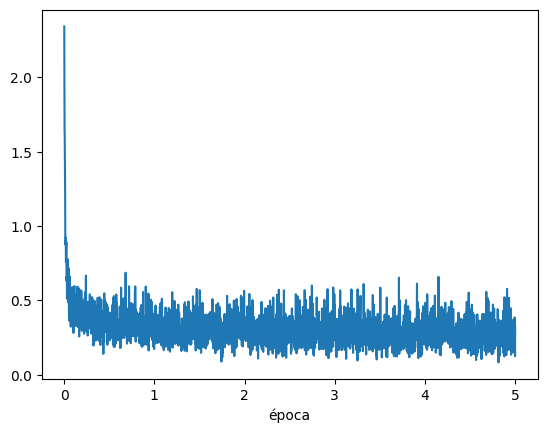

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

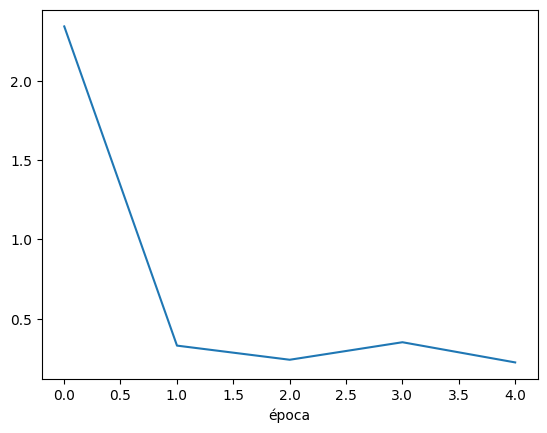

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

##Perguntas:
1 - R. 100

2 - R. 600

3 - R. Uma passagem completa por todo o conjunto de dados de treinamento.

In [14]:
#1
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.item())

        # PRINT DO MINIBATCH
        print(f'Época [{i+1}/{n_epochs}], Minibatch [{k+1}/{len(loader_train)}], Loss: {loss.item():.6f}')


Época [1/5], Minibatch [1/600], Loss: 0.220497
Época [1/5], Minibatch [2/600], Loss: 0.227404
Época [1/5], Minibatch [3/600], Loss: 0.440634
Época [1/5], Minibatch [4/600], Loss: 0.272427
Época [1/5], Minibatch [5/600], Loss: 0.310347
Época [1/5], Minibatch [6/600], Loss: 0.183693
Época [1/5], Minibatch [7/600], Loss: 0.257619
Época [1/5], Minibatch [8/600], Loss: 0.331944
Época [1/5], Minibatch [9/600], Loss: 0.175969
Época [1/5], Minibatch [10/600], Loss: 0.253854
Época [1/5], Minibatch [11/600], Loss: 0.200785
Época [1/5], Minibatch [12/600], Loss: 0.234921
Época [1/5], Minibatch [13/600], Loss: 0.272733
Época [1/5], Minibatch [14/600], Loss: 0.318625
Época [1/5], Minibatch [15/600], Loss: 0.369696
Época [1/5], Minibatch [16/600], Loss: 0.369632
Época [1/5], Minibatch [17/600], Loss: 0.240127
Época [1/5], Minibatch [18/600], Loss: 0.344194
Época [1/5], Minibatch [19/600], Loss: 0.195533
Época [1/5], Minibatch [20/600], Loss: 0.206376
Época [1/5], Minibatch [21/600], Loss: 0.291775
É


Treinando com batch_size = 100

Treinando com batch_size = 500

Treinando com batch_size = 750

Treinando com batch_size = 1000


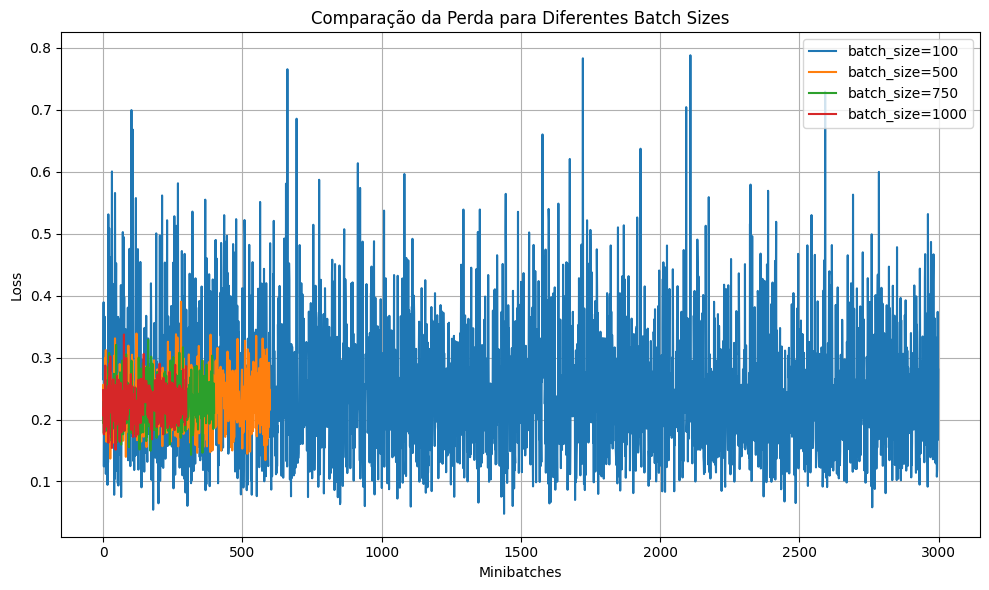

In [20]:
#2
def train_with_batch_size(batch_size, n_epochs=5):
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    losses = []
    total_samples = len(dataset_train)
    total_trained_samples = 0

    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            # Transforma a entrada para uma dimensão
            inputs = Variable(x_train.view(-1, 28 * 28))

            # Predição da rede
            outputs = model(inputs)

            # Calcula a perda
            loss = criterion(outputs, Variable(y_train))

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            losses.append(loss.item())


    return losses
# Testando diferentes tamanhos de minibatch
batch_sizes = [100, 500, 750, 1000]
results = {}

# Treinando com diferentes tamanhos de minibatch
for bs in batch_sizes:
    print(f"\nTreinando com batch_size = {bs}")
    results[bs] = train_with_batch_size(batch_size=bs, n_epochs=n_epochs)

# Plotando os resultados
plt.figure(figsize=(10, 6))
for bs in batch_sizes:
    plt.plot(results[bs], label=f'batch_size={bs}')
plt.xlabel('Minibatches')
plt.ylabel('Loss')
plt.title('Comparação da Perda para Diferentes Batch Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()